# Notebook de démonstration du fonctionnement du package workforce_scheduling

## Installation des dépendances

On vous propose d'installer les dépendances du package à partir de la cellule suivante si ce n'est toujours pas fait.

In [ ]:
! pip install ..

## Quelques imports utiles

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from workforce_scheduling.utils import get_schedule_from_npz
from workforce_scheduling.plot import plot_pareto_surface, plot_schedule
from workforce_scheduling.preferences.uta import run_uta
from workforce_scheduling.preferences.minmax_ranking import run_kbest

## Résolution sur des instances

On propose de déterminer les solutions non-dominées sur deux instances :
- l'instance du fichier `example/data/medium_instance.json`
- une instance générée par le script `./scripts/generate_instances.py` accessible depuis `example/data/instances_16/instance_0.json`

La cellule suivante recherche les solutions non-dominées pour ces deux instances. La cellule prend un certain temps à s'exécuter (de l'ordre de 1 à 2 heures). 

Les solutions ont été précalculées et sont disponibles dans les fichiers `example/solved/instances_16/instance_0/instance_0_pareto.csv` et `example/medium_instance/medium_instance_pareto.csv`.

In [ ]:
! python -m workforce_scheduling solve --data-path=./data/medium_instance.json
! python -m workforce_scheduling solve --data-path=./data/instances_16/instance_0.json

## Visualisation de solutions

### Surfaces de Pareto

Surface de Pareto de l'instance `medium.json`.

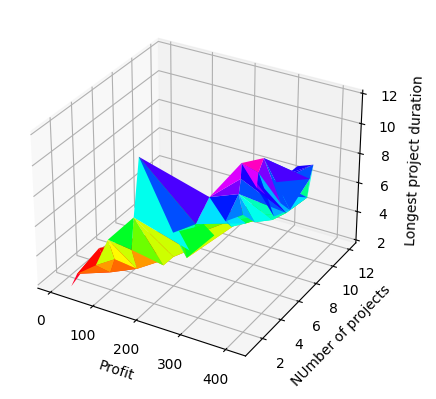

In [4]:
medium_pareto_df = pd.read_csv(Path("./solved/medium_instance/medium_instance_pareto.csv"))
plot_pareto_surface(medium_pareto_df)

Surface de Pareto de l'instance `instance_0.json`

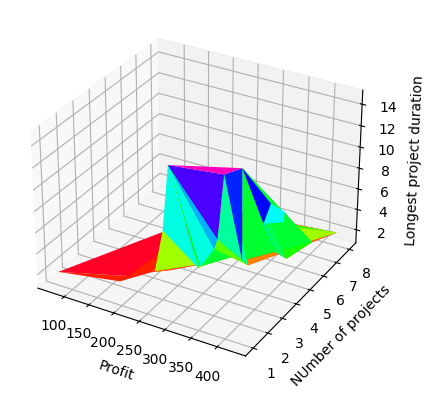

In [3]:
generated_pareto_df = pd.read_csv(Path("./solved/instances_16/instance_0/instance_0_pareto.csv"))
plot_pareto_surface(generated_pareto_df)

### Exemples d'emplois du temps

La cellule suivante affiche un emploi du temps possible pour l'instance `medium_instance.json`. Pour cette solution, le profit est de 411, le nombre maximal de projets par employé est de 6 et la durée du plus long projet s'élève à 10 jours.

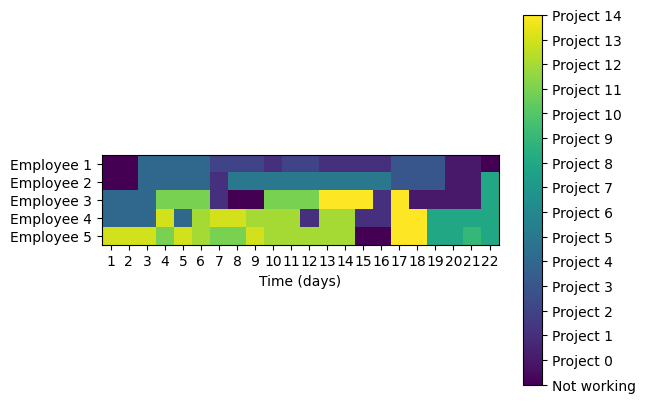

In [2]:
medium_schedule = get_schedule_from_npz(Path("./solved/medium_instance/workforce_scheduling34761.npz"))
plot_schedule(medium_schedule)

La cellule d'après montre un emploi du temps possible pour l'instance générée `instance_0.json`. Pour ce planning, le profit est de 427, le nombre maximal de projets par employé est de 6 et la durée du projet le plus long est de 4 jours.

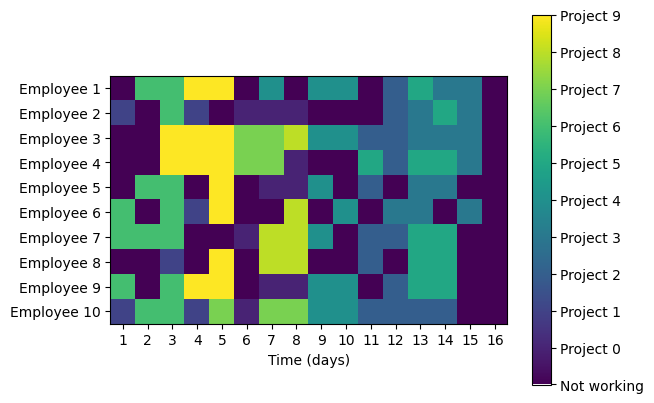

In [3]:
generated_schedule = get_schedule_from_npz(Path("./solved/instances_16/instance_0/workforce_scheduling72229.npz"))
plot_schedule(generated_schedule)